In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/image-for-notebook/Pink and White Geometric Marketing Presentation.png
/kaggle/input/image-for-notebook/Pink and White Geometric Marketing Presentation (1).png
/kaggle/input/lyrics/Songs.csv
/kaggle/input/font-style/DancingScript-VariableFont_wght.ttf


# <p style="background-color:#B291B6;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:20px 60px;">Lyrics Generator</p>

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Pink%20and%20White%20Geometric%20Marketing%20Presentation.gif?raw=true">

<p style="font-family:newtimeroman;font-size:120%;color:#444160;">In this project, I will be building a model to generate text. My goal is to build a song lyrics generator to explore the "creative" side of the Recurrent Neural Networks(RNN). RNN Text generator is one of my most desired to-do projects. I am finally checking this one off my to-do list. So yeyyy! </p> 

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#B291B6;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:20px 60px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. DATA EXPLORATION](#3)  
    
* [4. DATA PREPREPROCESSING](#4)  
    
* [5. MODEL BUILDING](#5) 
      
* [6. EVALUATING MODELS](#6)
    
* [7. CONCLUSION](#7)
    
* [8. END](#8)


<a id="1"></a>
# <p style="background-color:#B291B6;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:20px 60px;">IMPORTING LIBRARIES</p>


In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string, os
import nltk
import re
import keras
import random
import io
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adamax
import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont
import warnings
warnings.filterwarnings("ignore")


<a id="2"></a>
# <p style="background-color:#B291B6;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:20px 60px;">LOADING DATA</p>
For this project, I have prepared a dataset of song lyrics. Let's load it and have a look.

In [3]:
data = pd.read_csv("../input/lyrics/Songs.csv")
data.head()

,Artist,Title,Lyrics
0,Taylor Swift,cardigan,"Vintage tee, brand new phone\nHigh heels on co..."
1,Taylor Swift,exile,"I can see you standing, honey\nWith his arms a..."
2,Taylor Swift,Lover,We could leave the Christmas lights up 'til Ja...
3,Taylor Swift,the 1,"I'm doing good, I'm on some new shit\nBeen say..."
4,Taylor Swift,Look What You Made Me Do,I don't like your little games\nDon't like you...


<a id="3"></a>
# <p style="background-color:#B291B6;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:20px 60px;">DATA EXPLORATION</p>

**In this section, I will be:**
* Exploring the various artists in data
* Explore the number of songs and their corresponding information
* Explore the various words in lyrics via wordcloud 

In [4]:
#Printing the names of artists in the lyrics data
print("Artists in the data:\n",data.Artist.value_counts()) 

Artists in the data:
 David Bowie           50
Billy Joel            50
Taylor Swift          50
Billie Eilish         50
Eric Clapton          50
Leonard Cohen         50
Bruce Springsteen     40
The Beatles           35
George Michael        30
Vance Joy             30
Frank Sinatra         30
Elton John            30
​twenty one pilots    30
John Denver           30
Bryan Adams           30
Nat King Cole         30
Ray LaMontagne        30
Queen                 30
Lana Del Rey          30
Ed Sheeran            20
Bob Dylan             20
Name: Artist, dtype: int64


In [5]:
#Printing the size of dataset
print("Size of Dataset:",data.shape)

Size of Dataset: (745, 3)


So I have a total of 745 songs

**I will do a little feature engineering to extract more information on the songs such as:**
* Number of characters
* Number of words
* Number of lines

In [6]:
#Adding a column of numbers of Characters,words and sentences in each msg
data["No_of_Characters"] = data["Lyrics"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["Lyrics"]), axis=1).apply(len)
data["No_of_Lines"] = data["Lyrics"].str.split('\n').apply(len)
data.describe()

,No_of_Characters,No_of_Words,No_of_Lines
count,745.000000,745.000000,745.000000
mean,1403.347651,319.338255,46.277852
std,666.721467,156.067038,21.180531
min,1.000000,1.000000,1.000000
25%,946.000000,215.000000,33.000000
50%,1289.000000,291.000000,44.000000
75%,1714.000000,389.000000,56.000000
max,7267.000000,1652.000000,224.000000


To be noted: On average our songs have 1400-ish characters

<Figure size 1080x1080 with 0 Axes>

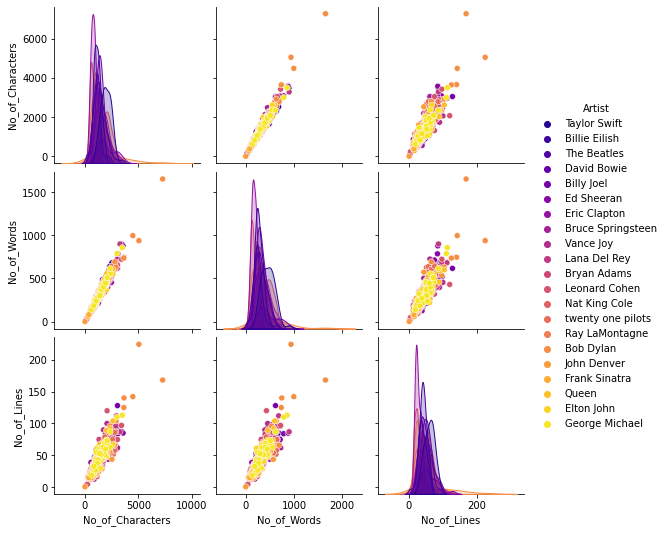

In [7]:
#Plotting the comparative song lengths for various artists
plt.figure(figsize=(15,15))
ax = sns.pairplot(data, hue="Artist", palette="plasma")

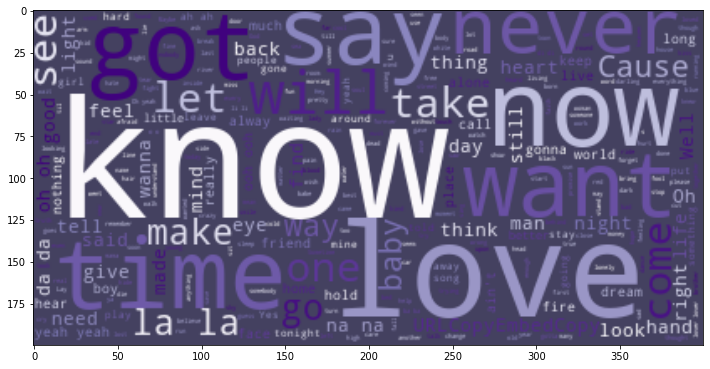

In [8]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="#444160",colormap="Purples", max_words=800).generate(" ".join(data["Lyrics"]))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

*Unsurprisingly one of the most frequent words in songs is "Love".*

Next let us look at the lyrics of song No 42 in the lyrics. Why 42 you may ask! Well! because it is the answer to the Ultimate Question of Life, the Universe, and Everything. 🐬 

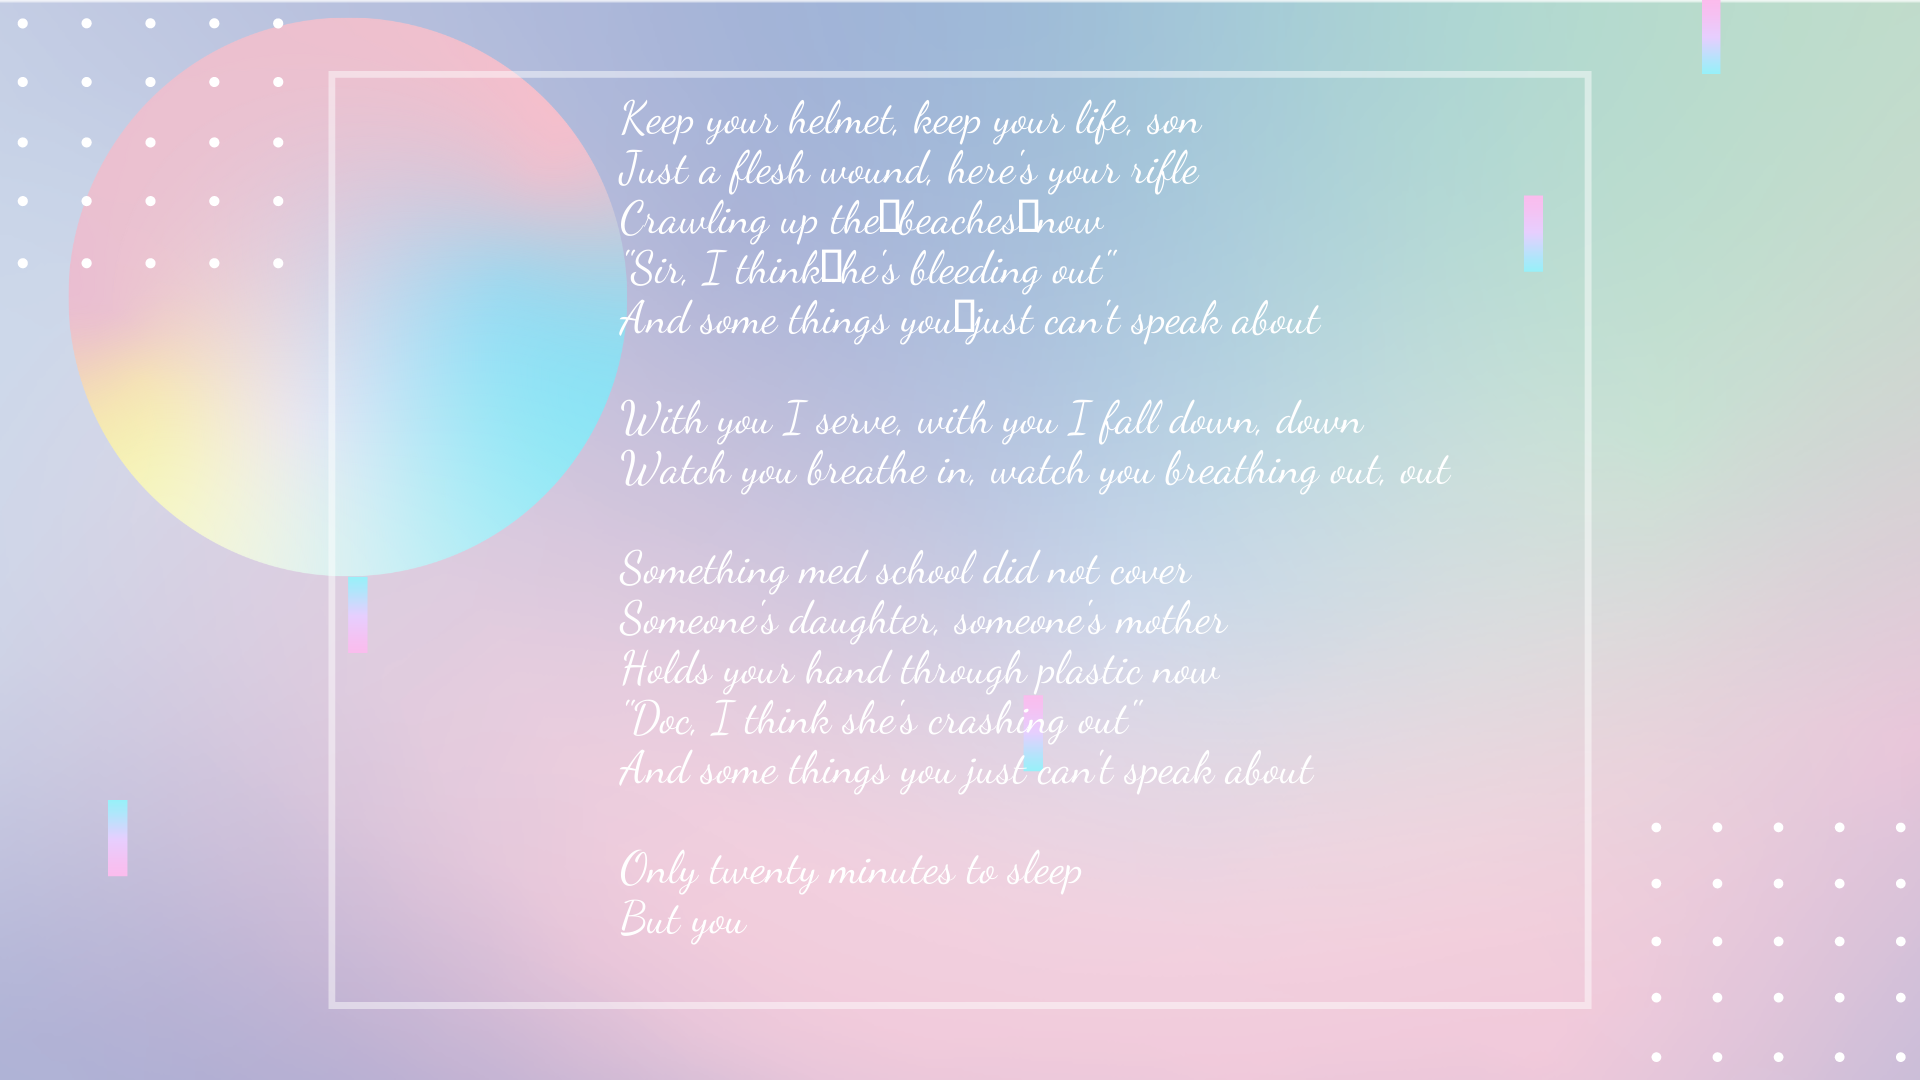

In [9]:
#A function to disply the song in an asthetically pleasing way! lol
def My_song(song):
    img = Image.open("../input/image-for-notebook/Pink and White Geometric Marketing Presentation (1).png")
    Text_on_image = ImageDraw.Draw(img)
    myFont = ImageFont.truetype("../input/font-style/DancingScript-VariableFont_wght.ttf", 45)
    Text_on_image.text((620,90), song, font=myFont, fill =(255, 255, 255))
    return img    
#Having a look at the first 500 charachters of a random song lyrics
My_song(data.Lyrics[42][:500])

The generation of text with RNN involves the following workflow.  

<p style="background-color:#B3C5E3;font-family:newtimeroman;color:#444160;text-align:center;font-size:120%;">Loading Data ➡️ Preprocessing ➡️ Building Mapping Dictionary ➡️ Building Model ➡️ Generating Text</p>

As I have loaded and explored the data,  I will proceed further by pre-processing the text.  


<a id="4"></a>
# <p style="background-color:#B291B6;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:20px 60px;">DATA PREPROCESSING</p>

**In this section, I will be performing the following:**

**Creating a Corpus of Lyrics text:** For the model, we need a sequence of the text string. I am creating a Corpus out of Lyrics column. 

**Removing the unrequired characters that may have sneaked in my text corpus:** The data cleaning process for NLP is crucial preprocessing. To do that, I look into the Corpus to check for what this Corpus is comprised of. That is, all the unique symbols present. After examining the Corpus, I will be eliminating any foreign language or irrelevant symbols from the Corpus. 

**Creating a dictionary to map characters and their indices:** The computer doesn’t understand the text. For the computer, the text is just a cluster of symbols. It works with numbers. So we create a dictionary to map each unique character in our Corpus to a number and vice versa. This will be used to encode and decode the information going in and getting out of the RNN

**Splitting the corpus into smaller sentences of equal length:** Encoding and splitting the corpus into smaller sequences of equal length: At this point, Corpus contain only intended characters (i.e, lower cap English alphabets, Numbers and a few punctuations). We will encode this corpus and create small sequences of equal lengths of features and the corresponding targets. Each feature and target will contain the mapped index in the dictionary of the unique characters they signify. 

The labels are then resized and normalized. Whereas the targets are one-hot encoded. Ready to be sent to the RNN for the training, but before that let us built the RNN model. 

**Creating a Corpus**

In [10]:
#Lining up all the lyrics to create corpus
Corpus =''
for listitem in data.Lyrics:
    Corpus += listitem
    
Corpus = Corpus.lower() #converting all alphabets to lowecase 
print("Number of unique characters:", len(set(Corpus)))

Number of unique characters: 92


The total number of unique characters present in the Corpus clearly shows, that some of the foreign language scripts have sneaked in. I will take a look at all the characters present. I will then remove the unrequired characters. 

In [11]:
#To See all the unique characters present in the Corpus
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\n', ' ', '!', '"', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '>', '?', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '}', '~', '©', 'à', 'á', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'ñ', 'ó', 'ö', 'ü', 'ŏ', 'е', 'ا', 'س', 'ل', 'م', 'و', '\u2005', '\u200a', '\u200b', '–', '—', '‘', '’', '‚', '“', '”', '…', '\u205f', '\ufeff']


In [12]:
#Keeping only a limited set of characters. 
to_remove = ['{', '}', '~', '©', 'à', 'á', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'ñ', 'ó', 'ö', 'ü', 'ŏ',
             'е', 'ا', 'س', 'ل', 'م', 'و', '\u2005', '\u200a', '\u200b', '–', '—', '‘', '’', '‚', '“', '”', 
             '…', '\u205f', '\ufeff', '!', '&', '(', ')', '*', '-',  '/', ]
for symbol in to_remove:
    Corpus = Corpus.replace(symbol," ")

#Corpus = re.sub("[^A-Za-z0-9'\.\n]","",Corpus) Alterneativly could be used but I want to pick and chose (:

In [13]:
#To See all the unique characters present in the Corpus
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\n', ' ', '"', "'", ',', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '>', '?', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


**Creating a list of sorted unique characters**

In [14]:
# Storing all the unique characters present in my corpus to bult a mapping dic. 
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #length of corpus
L_symb = len(symb) #length of total unique characters

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 1045494
Number of unique characters: 47


In [15]:
#Splitting the Corpus in equal length of strings and output target
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])
    
    
L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 1045454


**Encoding the Labels and Targets**

In [16]:
# reshape X and normalize
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)

# one hot encode the output variable
y = np_utils.to_categorical(targets)

<a id="5"></a>
# <p style="background-color:#B291B6;font-family:newtimeroman;font-size:150%;color:#444160;text-align:center;border-radius:20px 60px;">MODEL BUILDING</p>


Recurrent Neural Networks are pretty popular with generating text. In this project, I will be using a LSTM Model, an improved version of a standard recurrent neural network

**Following steps are involved in the model building**

* Initialising the Model
* Defining by adding layers
* Compiling the Model
* Training the Model

**Building the Model**

In [17]:
#Initialising the Model
model = Sequential()
#Adding layers
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))
#Compiling the model for training  
opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

#Model's Summary               
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 47)                12079     
Total params: 276,271
Trainable params: 276,271
Non-trainable params: 0
_________________________________________________________________


In [18]:
#Training the Model
history = model.fit(X, y, batch_size=128, epochs=100)

Epoch 1/100
8168/8168 [==============================] - 56s 6ms/step - loss: 2.7465
Epoch 2/100
8168/8168 [==============================] - 49s 6ms/step - loss: 2.3363
Epoch 3/100
8168/8168 [==============================] - 49s 6ms/step - loss: 2.1512
Epoch 4/100
8168/8168 [==============================] - 49s 6ms/step - loss: 2.0459
Epoch 5/100
8168/8168 [==============================] - 49s 6ms/step - loss: 1.9783
Epoch 6/100
8168/8168 [==============================] - 49s 6ms/step - loss: 1.9129
Epoch 7/100
8168/8168 [==============================] - 49s 6ms/step - loss: 1.8827
Epoch 8/100
8168/8168 [==============================] - 49s 6ms/step - loss: 1.8615
Epoch 9/100
8168/8168 [==============================] - 50s 6ms/step - loss: 1.8378
Epoch 10/100
8168/8168 [==============================] - 49s 6ms/step - loss: 1.8174
Epoch 11/100
8168/8168 [==============================] - 49s 6ms/step - loss: 1.7924
Epoch 12/100
8168/8168 [==============================] - 49s 6

In [19]:
from keras.models import load_model
#To be used later; I am saving the model 
model.save("Lyrics_Generator.h5")

<a id="6"></a>
# <p style="background-color:#B291B6;font-family:newtimeroman;font-size:150%;color:#444160;text-align:center;border-radius:20px 60px;">EVALUATING MODELS</p>

Now that I have my model trained on the songs lyrics let us see how it performs. I hope it creates some sensible song.

**To evaluate my model, I shall be having a look at:**
* The performance of the model via Learning Curves
* The outcome text it generates

**Plotting the learning curve for the loss function**

[Text(0.5, 0, 'Epochs')]

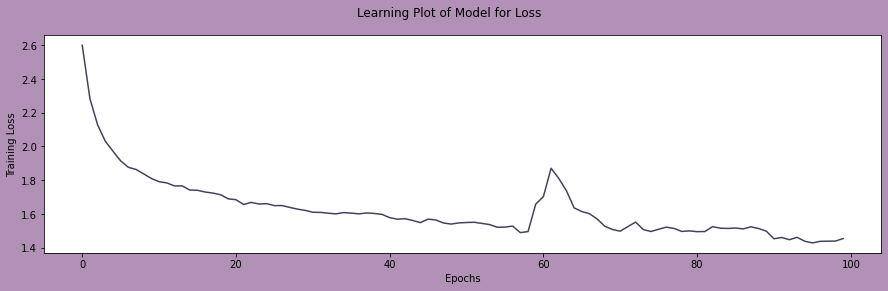

In [20]:
history_df = pd.DataFrame(history.history)
#Plotting the learnings 

fig = plt.figure(figsize=(15,4), facecolor="#B291B6")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

**Generating the songs**

In [21]:
# The function to generate text from model
def Lyrics_Generator(starter,Ch_count): #,temperature=1.0):
    generated= ""
    starter = starter 
    seed=[mapping[char] for char in starter]
    generated += starter 
    # Generating new text of given length
    for i in range(Ch_count):
        seed=[mapping[char] for char in starter]
        x_pred = np.reshape(seed, (1, len(seed), 1))
        x_pred = x_pred/ float(L_symb)
        prediction = model.predict(x_pred, verbose=0)[0]  
        # Getting the index of the next most probable index
        prediction = np.asarray(prediction).astype('float64')
        prediction = np.log(prediction) / 1.0 
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        probas = np.random.multinomial(1, prediction, 1)
        index = np.argmax(prediction)
        next_char = reverse_mapping[index]  
        # Generating new text
        generated += next_char
        starter = starter[1:] + next_char
       
    return generated

Let us finally see the outcome by putting a seed in from one of my old blogposts [blogpost](https://karnikakapoor.blogspot.com/2017/04/killers-confession.html)

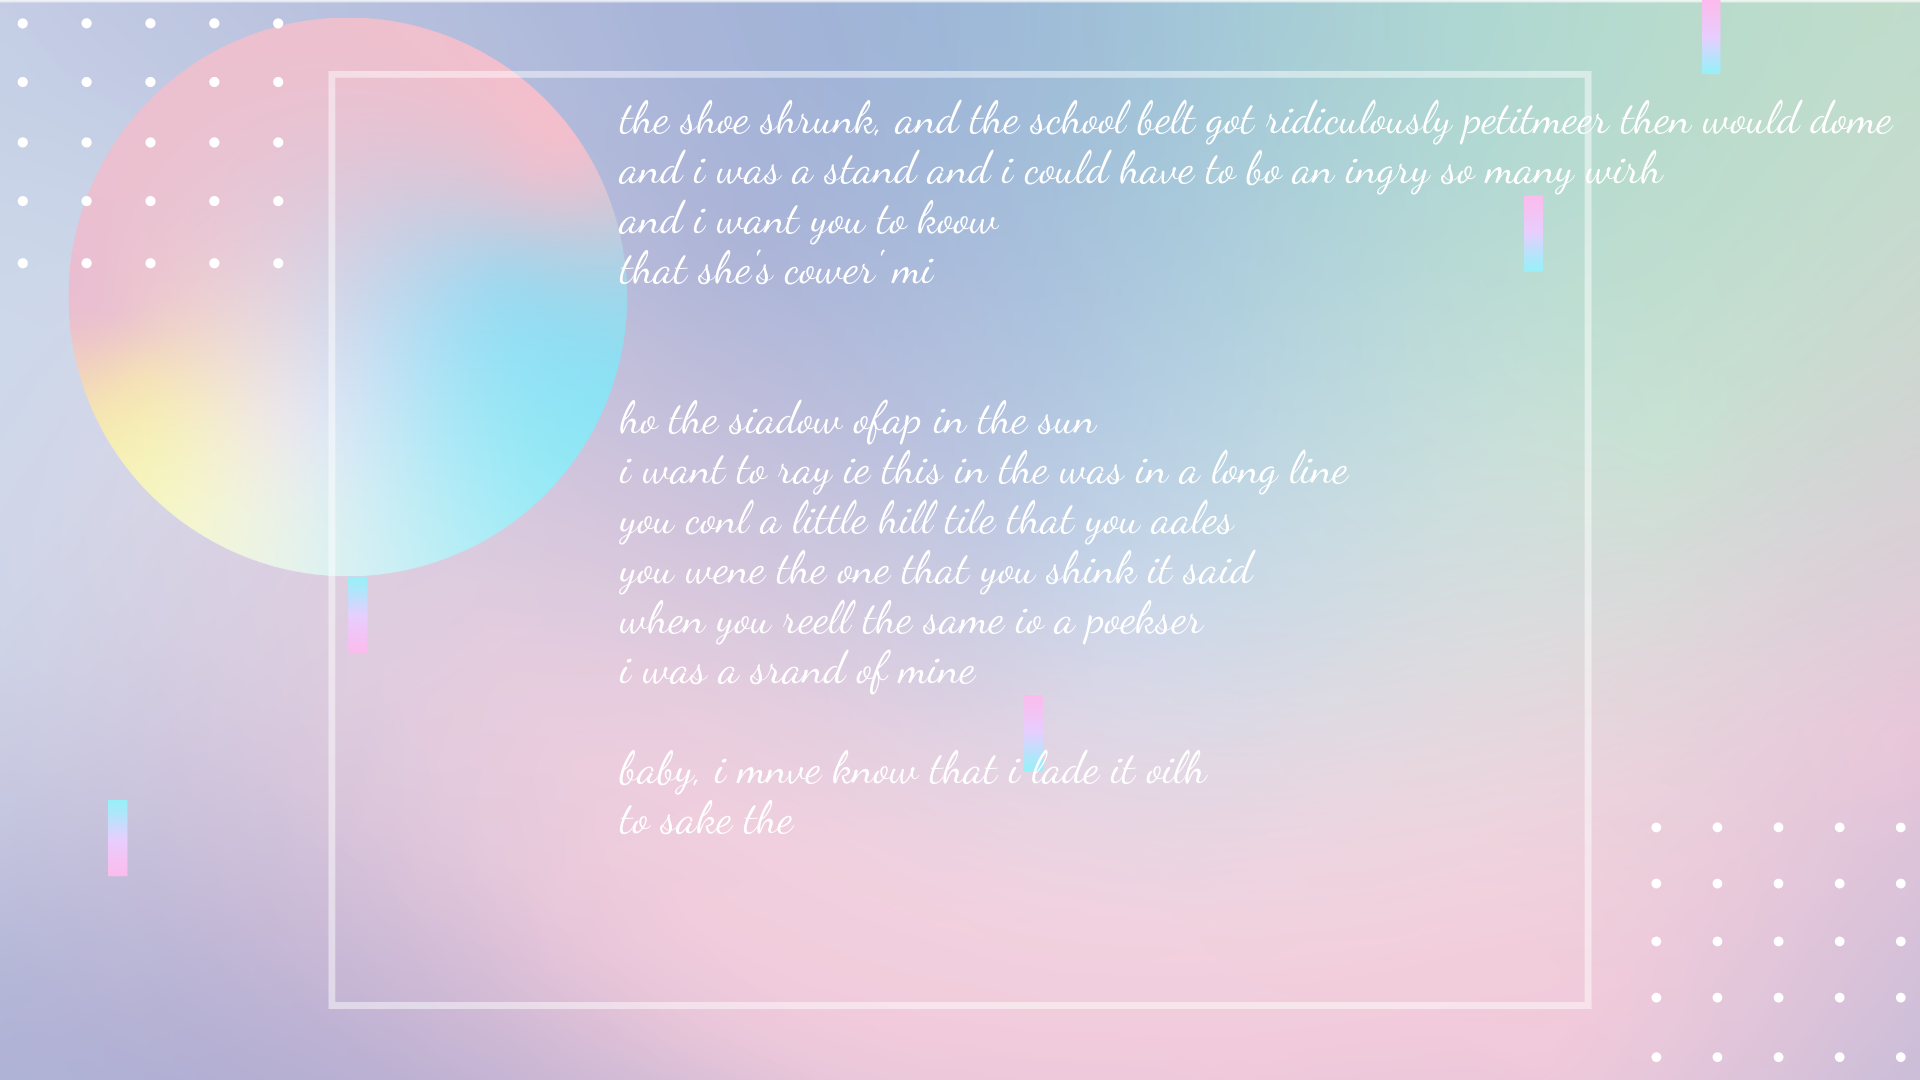

In [25]:
#Generating a song from the model
song_1 = Lyrics_Generator("the shoe shrunk, and the school belt got ridiculously petit", 400)
#Let's have a look at the song
My_song(song_1)

Another song generated by a seed of the lyrics of a song that's stuck in my head today. (Sunflower by Shannon Purser)

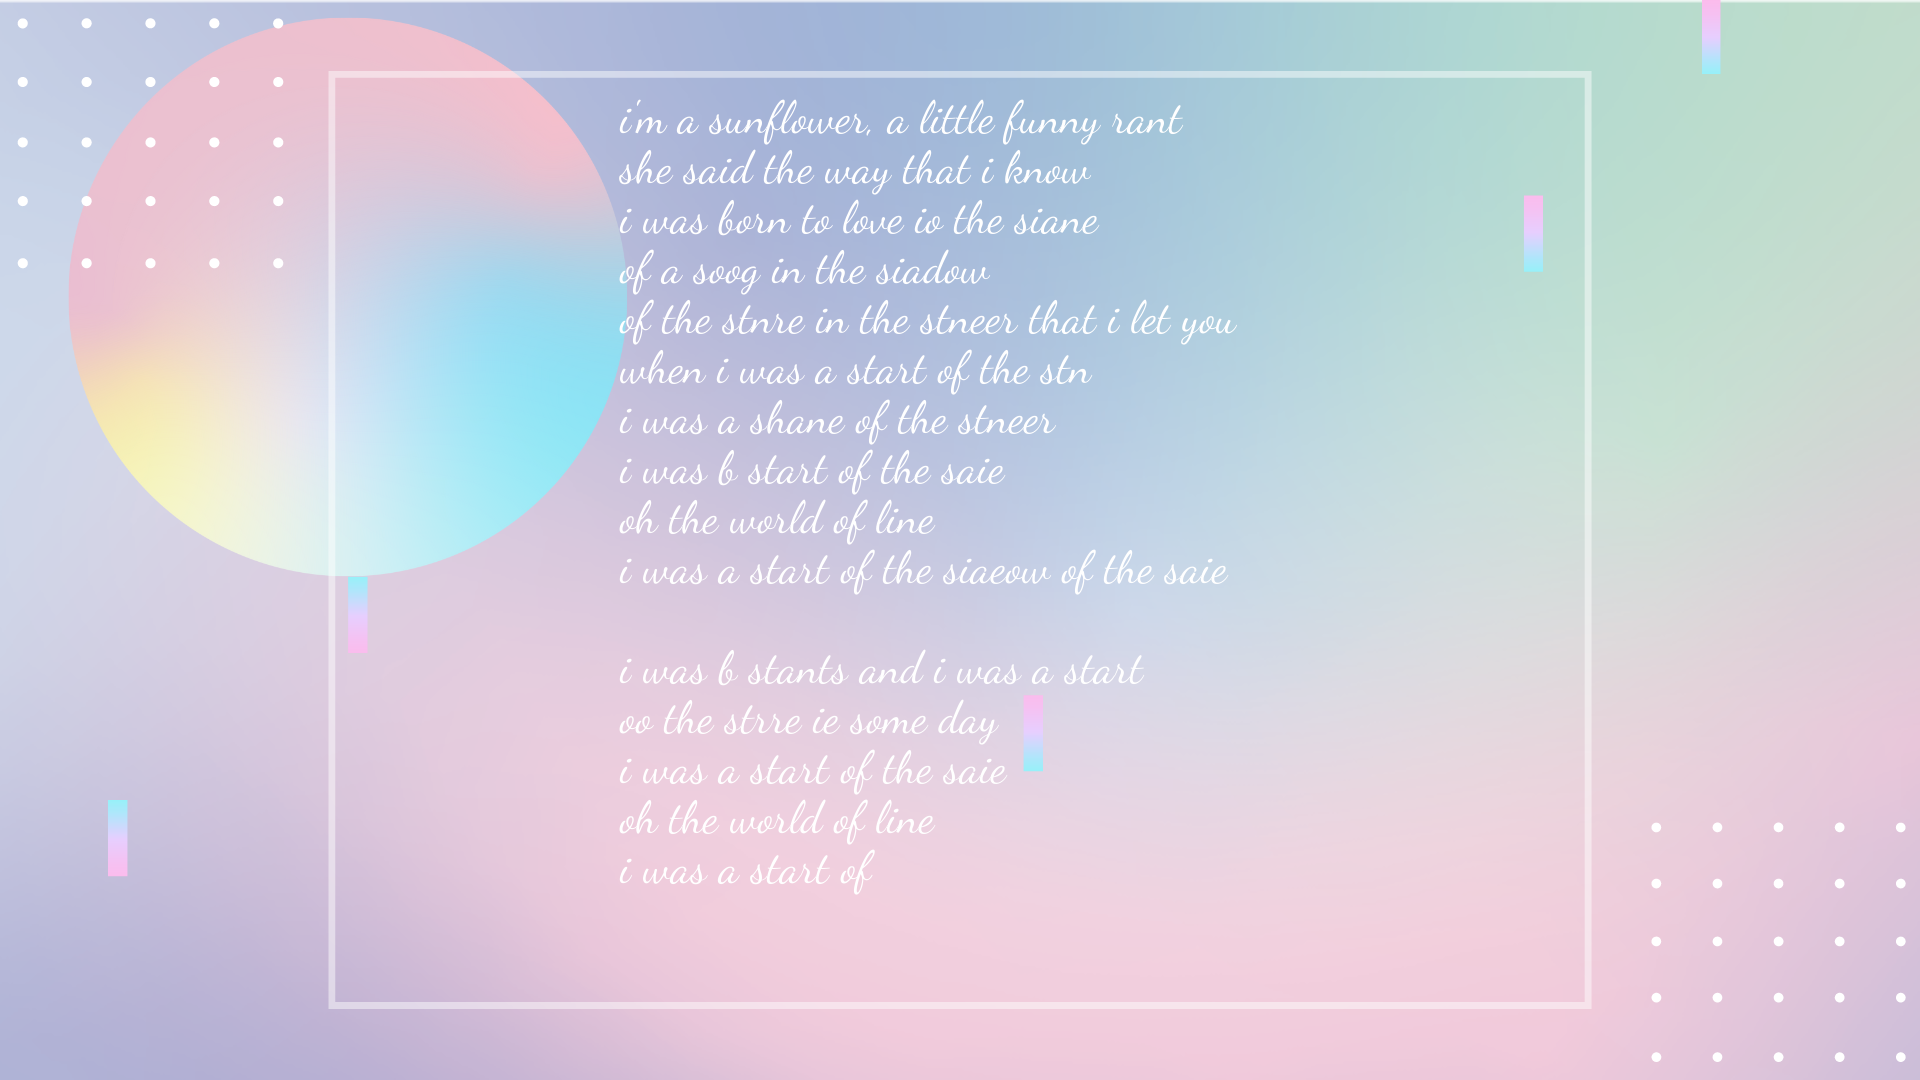

In [26]:
#Generating a song from the model using a song out of the corpus
song_2 = Lyrics_Generator("i'm a sunflower, a little funny", 400)
#Let's have a look at the song
My_song(song_2)

<a id="7"></a>
# <p style="background-color:#B291B6;font-family:newtimeroman;font-size:150%;color:#444160;text-align:center;border-radius:20px 60px;">CONCLUSION</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160">On observing the output of the Lyrics Generator, it is clear that while some of the sentences might be correct, but most of the lyrics do not make sense. It does look like a song tho. The model didn't learn the meaning of the songs. However, the character-based approach is producing some legitimate words. 
To get to a song that makes better sense I may consider a transformer-based text generator, but that's for some other time.</p>

<p style="font-family:newtimeroman;font-size:120%;color:#444160;"> Neural networks amaze me all the time. There is something surreal about them that makes working with it exciting. Of course, we can peel off the layers and see the maths behind them. Get to the matrices and tensor to understand how these neurons are working. Even get the values of weights and biases and assure ourselves that this is no sorcery.  Still, when I see the result play out it is astonishing.</p>  

**Some useful resources on Text generation:**

[The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)

[RNN ](https://towardsdatascience.com/character-level-language-model-1439f5dd87fe)

[GTP-2 ](https://openai.com/blog/better-language-models/) 


**<span style="color:#444160;"> If you liked this Notebook, please do upvote.</span>**

**<span style="color:#444160;"> Best Wishes!</span>**

<a id="8"></a>
# <p style="background-color:#B291B6;font-family:newtimeroman;font-size:150%;color:#444160;text-align:center;border-radius:20px 60px;">END</p>